# Relaciones de Kramer-Kronig

## Alejandro Velez Zea

En este notebook se incluye un codigo basado en el metodo de McLaurin para calcular las relaciones de Kramers-Kronig

In [5]:
#Cargamos las librerias necesarias
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
from scipy.signal import medfilt

/tmp/ipykernel_17403/4097367477.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  f = pd.read_csv ('Datos/AL.Master.dark', sep='\t',skiprows=14, skipfooter=1)
/tmp/ipykernel_17403/4097367477.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  f = pd.read_csv ('Datos/AL.Master.reference', sep='\t',skiprows=14, skipfooter=1)
/tmp/ipykernel_17403/4097367477.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  f = pd.read_csv ('Datos/AL.Master.dark', sep='\t',skiprows=14, skipfooter=1)
/tmp/ipykernel_17403/4097367477.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid thi

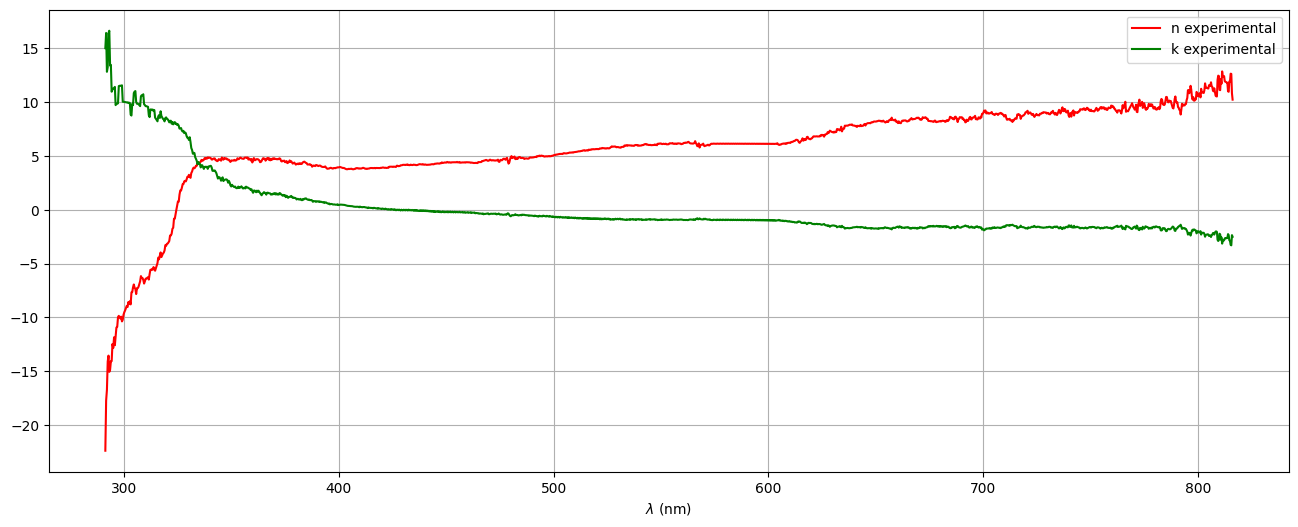

In [8]:
#Usamos pandas para cargar los espectros tomados con el Ocean Optics 2000
#lim y lim2 nos permite acotar el rango del espectro a tomar. Las longuitudes de onda donde la señal de referencia es muy baja deben despreciarse, ya tendran un gran error en la reflectancia.
lim=300
lim2=200
#Window size determina un tamaño de filtro para suavizar el espectro. Debe ser un valor par.
Window_size=201
#Se carga la señal oscura de la referencia
f = pd.read_csv ('Datos/AL.Master.dark', sep='\t',skiprows=14, skipfooter=1)
Ir = np.array(f)[lim:-lim2,1]
wld = np.array(f)[lim:-lim2,0]
#Se carga la señal de la referencia
f = pd.read_csv ('Datos/AL.Master.reference', sep='\t',skiprows=14, skipfooter=1)
Is = np.array(f)[lim:-lim2,1]
#Se carga la señal oscura de la muestra
f = pd.read_csv ('Datos/AL.Master.dark', sep='\t',skiprows=14, skipfooter=1)
Ir1 = np.array(f)[lim:-lim2,1]
#Se carga la señal de la muestra
f = pd.read_csv ('Datos/AL.Master.sample', sep='\t',skiprows=14, skipfooter=1)
Is1 = np.array(f)[lim:-lim2,1]
Is1=Is1
Is=Is
#Aqui se filtra el espectro y la referencia
Is1=medfilt(medfilt(Is1,kernel_size=Window_size))
Is=medfilt(medfilt(Is,kernel_size=Window_size))
#Se calcula la reflectancia y grafica
R1=Is1/Is


#Finalmente, calculamos la fase del coeficiente de reflexion a partir de la reflectancia
wn2d = 1/wld[::-1]
R2=R1   
lnr=np.log(R2)/2
# método Mc Claurin
dn = np.zeros(len(wn2d))
h = wn2d[1]-wn2d[0]
for ii in range(len(wn2d)):
  if(ii % 2 == 0 ):
    f = 0 
    for jj in range(1,len(wn2d),2):
      f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
  else:
    f = 0
    for jj in range(0,len(wn2d),2):
      f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
      
  dn[ii] = 2*2*h/np.pi*f
  phaser = -dn
  
nn=(1-R2**2)/(1+R2**2-2*R2*np.cos(phaser))
kk=2*R2*np.sin(phaser)/(1+R2**2-2*R2*np.cos(phaser))

plt.figure(figsize=(16,6))
plt.plot(wld,nn,'r-',label='n experimental')
plt.plot(wld,kk,'g-',label='k experimental')
plt.xlabel(r'$\lambda$ (nm)')
plt.legend()
plt.grid()
plt.show()


# #Cargamos un archivo con los valores de n y k teoricos para el Si
# col_names=['Longitud de onda (nm)', 'n','k']
# f = pd.read_csv (r'./Si.txt', sep='\t',skiprows=1,names=col_names)
# f=np.array(f[50:-50])

# #Se calcula la reflectancia teorica a partir de los valores de n y k
# R=((f[:,1]-1)**2+f[:,2]**2)/((f[:,1]+1)**2+f[:,2]**2)
# #Graficamos
# font = {'weight' : 'bold', 'size'   : 16}
# matplotlib.rc('font', **font)
# fig = plt.figure(figsize=(12,6))
# fig.suptitle('Si')
# ax1 = plt.subplot()
# plt.ylim(0,1)

# lns1 = ax1.plot(wld,R1,marker='o',color='green',markersize=11,label='R experimental')
# plt.grid()
# ax2 = ax1.twinx()

# lns2 = ax2.plot(f[:,0],R,color='red',marker='o',markersize=11,label='R teorica')
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc=0)
# plt.ylim(0,1)

# font = {'weight' : 'bold', 'size'   : 16}
# matplotlib.rc('font', **font)
# fig = plt.figure(figsize=(12,6))
# fig.suptitle('Si')

# ax1 = plt.subplot()
# lns1 = ax1.plot(f[:,0],f[:,1],marker='o',color='green',markersize=11,label='n')
# plt.ylabel('n')
# plt.xlabel(r'Longitud de onda/$\mu$m')
# #ax1.legend()
# plt.grid()

# ax2 = ax1.twinx()
# lns2 = ax2.plot(f[:,0],f[:,2],color='red',marker='o',markersize=11,label='k')
# plt.ylabel('k')


# # added these three lines
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc=0)

# plt.show()

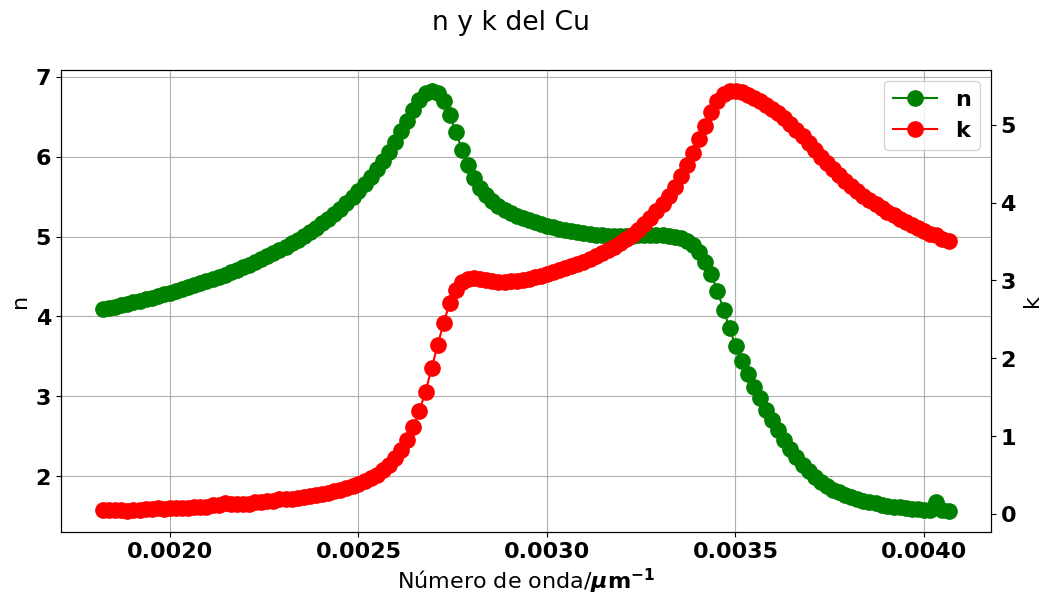

In [23]:
#Usamos el algoritmo de Ohta con el metodo de McLaurin para hallar k en funcion del n teorico y comparar con el k teorico. 
#La relacion de Kramer-Konig en este caso se escribe en terminos del numero de onda. Primero graficaremos n y k teorico en funcion del numero de onda
wl = f[:,0]
wn2 = 1/wl[::-1]
k_interp = f[:,2][::-1]
n_interp = f[:,1][::-1]
fig = plt.figure(figsize=(12,6))
fig.suptitle('n y k del Cu')


ax1 = plt.subplot()
lns1 = ax1.plot(wn2,n_interp,marker='o',color='green',markersize=11,label='n')
plt.ylabel('n')
plt.xlabel(r'Número de onda/$\mu \mathbf{m}^{-1}$')
#ax1.legend()
plt.grid()

ax2 = ax1.twinx()
lns2 = ax2.plot(wn2,k_interp,color='red',marker='o',markersize=11,label='k')
plt.ylabel('k')



# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

Frecuencia falor conocido =  0.0 um^-1


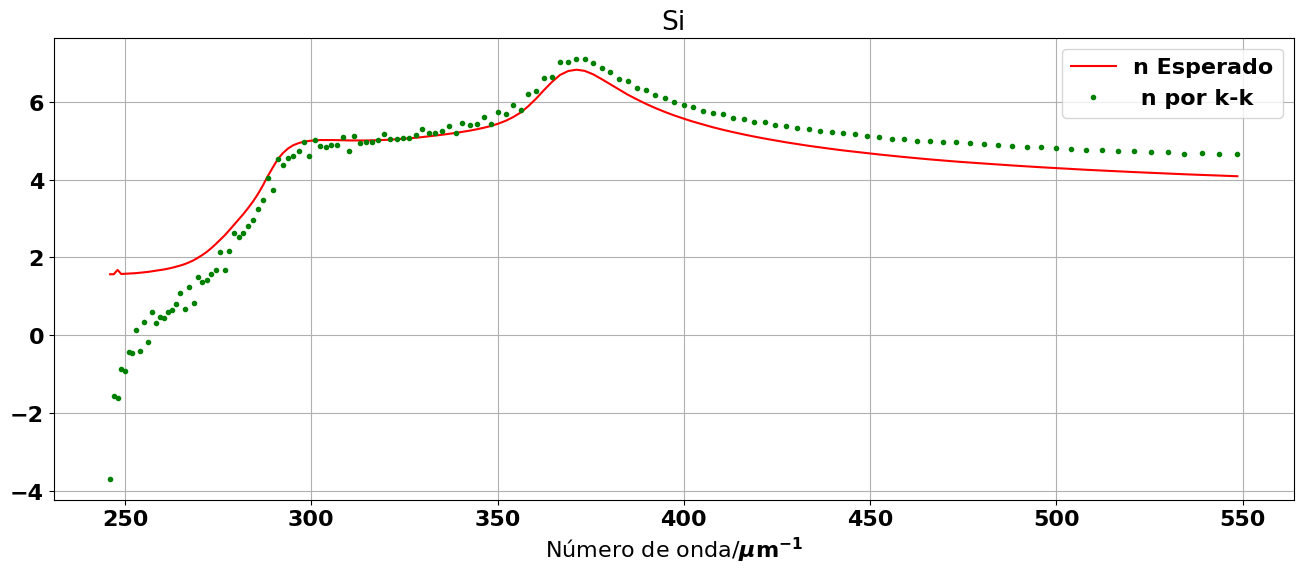

In [14]:
# método Mc Claurin
dn = np.zeros(len(wn2))
h = wn2[1]-wn2[0]
for ii in range(len(wn2)):
  if(ii % 2 == 0 ):
    f = 0 
    for jj in range(1,len(wn2),2):
      f = f + wn2[jj]*k_interp[jj]/(wn2[jj]**2 - wn2[ii]**2)
  else:
    f = 0
    for jj in range(0,len(wn2),2):
      f = f + wn2[jj]*k_interp[jj]/(wn2[jj]**2 - wn2[ii]**2)
      
  dn[ii] = 2*2*h/np.pi*f
  n_kk = dn + (n_interp[int(len(wn2)/2)] - dn[int(len(wn2)/2)]) # Aquí se introduce el valor conocido, asegurando que la diferencia entre el valor encontrado y el conocido sea cero.

val_c = wn2[int(len(wn2)/2)]
print('Frecuencia falor conocido =  %.1f um^-1'%val_c)
  
plt.figure(figsize=(16,6))
plt.title('Si')
plt.plot(wl,n_interp[::-1],'r-',label='n Esperado')
plt.plot(wl,n_kk[::-1],'g.',label=' n por k-k')
plt.xlabel(r'Número de onda/$\mu \mathbf{m}^{-1}$')
plt.legend()
plt.grid()
plt.show()

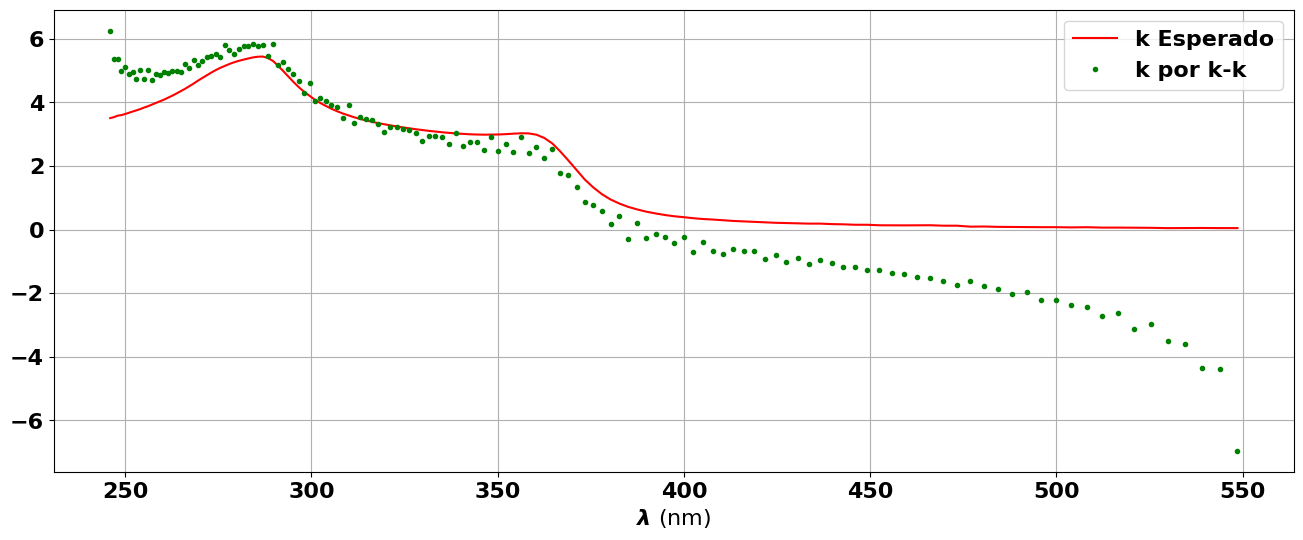

In [5]:
# Ahora calcularemos k a partir del n teorico usando Kramer-Konig.
dn = np.zeros(len(wn2))
h = wn2[1]-wn2[0]
for ii in range(len(wn2)):
  if(ii % 2 == 0 ):
    f = 0 
    for jj in range(1,len(wn2),2):
      f = f + wn2[ii]*n_interp[jj]/(wn2[jj]**2 - wn2[ii]**2)
  else:
    f = 0
    for jj in range(0,len(wn2),2):
      f = f + wn2[ii]*n_interp[jj]/(wn2[jj]**2 - wn2[ii]**2)
      
  dn[ii] = 2*2*h/np.pi*f
  k_kk = -dn + (k_interp[int(len(wn2)/2)] + dn[int(len(wn2)/2)])

plt.figure(figsize=(16,6))
plt.plot(wl,k_interp[::-1],'r-',label='k Esperado')
plt.plot(wl,k_kk[::-1],'g.',label='k por k-k')
plt.xlabel(r'$\lambda$ (nm)')
plt.legend()
plt.grid()
plt.show()

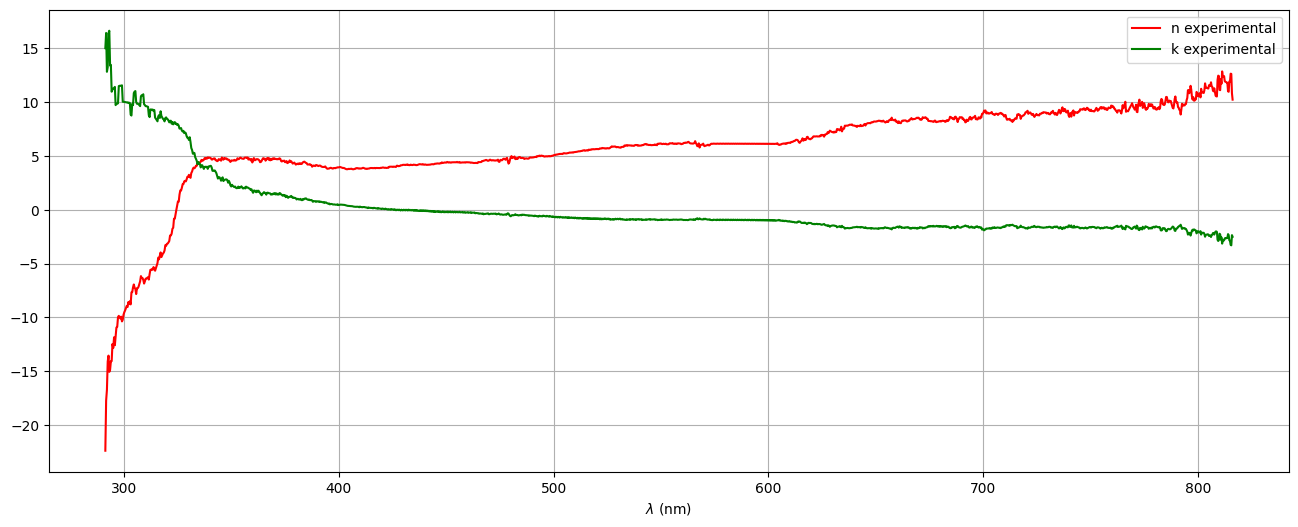

In [7]:
#Finalmente, calculamos la fase del coeficiente de reflexion a partir de la reflectancia
wn2d = 1/wld[::-1]
R2=R1   
lnr=np.log(R2)/2
# método Mc Claurin
dn = np.zeros(len(wn2d))
h = wn2d[1]-wn2d[0]
for ii in range(len(wn2d)):
  if(ii % 2 == 0 ):
    f = 0 
    for jj in range(1,len(wn2d),2):
      f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
  else:
    f = 0
    for jj in range(0,len(wn2d),2):
      f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
      
  dn[ii] = 2*2*h/np.pi*f
  phaser = -dn
  
nn=(1-R2**2)/(1+R2**2-2*R2*np.cos(phaser))
kk=2*R2*np.sin(phaser)/(1+R2**2-2*R2*np.cos(phaser))

plt.figure(figsize=(16,6))
plt.plot(wld,nn,'r-',label='n experimental')
plt.plot(wld,kk,'g-',label='k experimental')
plt.xlabel(r'$\lambda$ (nm)')
plt.legend()
plt.grid()
plt.show()
